# Bank Churn Prediction using Neural Networks 


## Content

Banks are having a problem with customers leaving. They want additional insights on which parts of the customer service can influence a customer's decision to leave. 

## Objective 

Make a neural network that can determine if a customer will leave in 6 months or not. 

## Table of Contents 

1. [Import the code](#Import-library)
2. [Import data](#Import-the-data)
3. [EDA](#EDA)
4. [Data Preprocessing](#Data-preprocessing)
5. [Model Building](#Neural-Network)

## Import library 

In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn     
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Import the data

In [3]:
data = pd.read_csv("bank.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
data.Geography.nunique

<bound method IndexOpsMixin.nunique of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Insights on data and missing values 
- there are 10000 unique data entries 
- there are no missing values in the dataset  
- there are 14 different data variables for each customer

In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
## drop customer attributes that will not be useful or relevant to our NN 
## such as Row Number, Customer Id and Surname, as they do not add anything to our analysis, but are rather, 
## are personal identifiers, so they will be dropped from the dataset
data.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace = True)

### EDA

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


<Figure size 144x360 with 0 Axes>

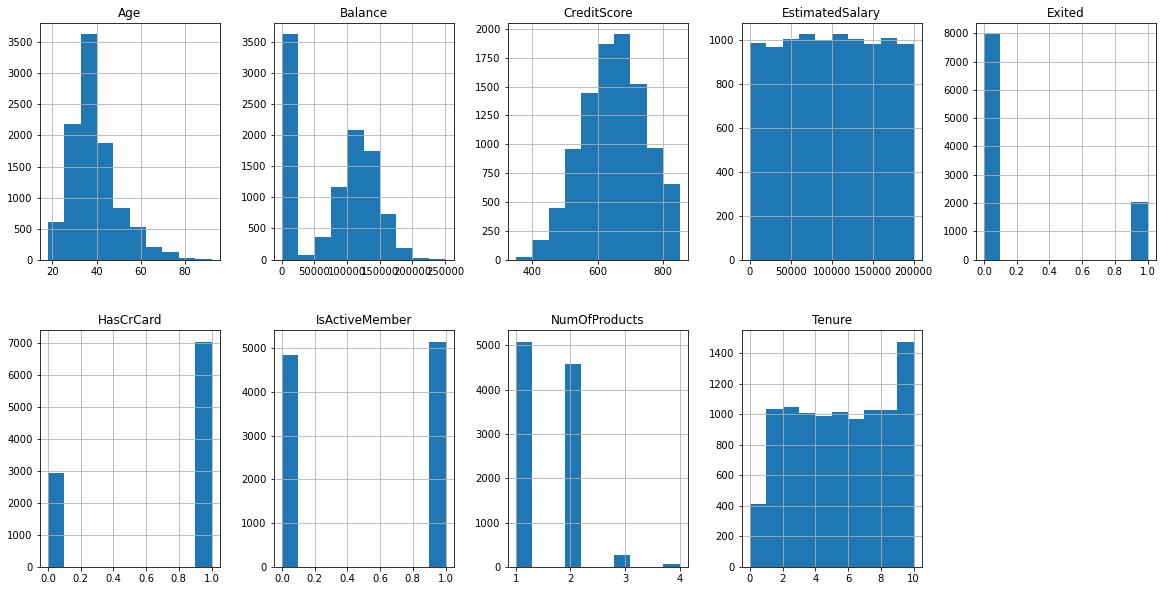

In [12]:
### Univariate Analysis

plt.figure(figsize=(2,5))
cols1 = list(data)

print (cols1)
data[cols1].hist(stacked=False, bins=10, figsize=(20,10), layout=(2,5)); 

[Text(0.5, 1.0, 'Tenure')]

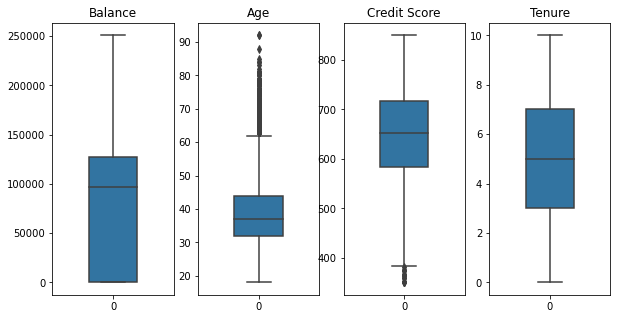

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

sns.boxplot(ax=axes[0], data=data["Balance"], showfliers=True,width =0.4) .set(title="Balance")
sns.boxplot(ax=axes[1], data=data["Age"], showfliers=True,width =0.4) .set(title="Age")
sns.boxplot(ax=axes[2], data=data["CreditScore"], showfliers=True,width =0.4) .set(title="Credit Score")
sns.boxplot(ax=axes[3], data=data["Tenure"], showfliers=True,width =0.4) .set(title="Tenure")

In [14]:
#### Bivariate Analysis

data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


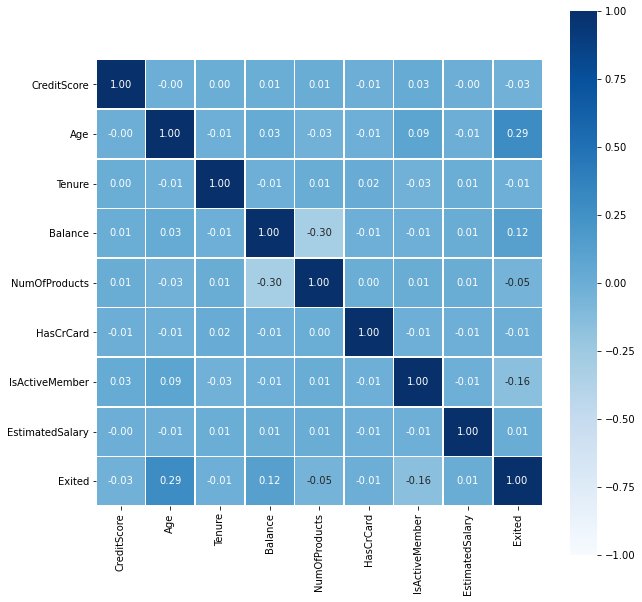

In [15]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),cmap='Blues',annot=True, fmt=".2f", vmin=-1, vmax=1, center= 0, square=True, linewidths=.7)

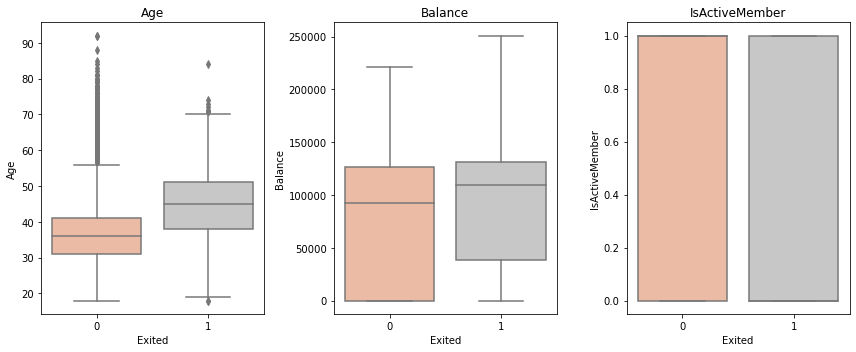

In [16]:
cols = data[['Age', 'Balance', 'IsActiveMember']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['Exited'],data[variable],palette="RdGy")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

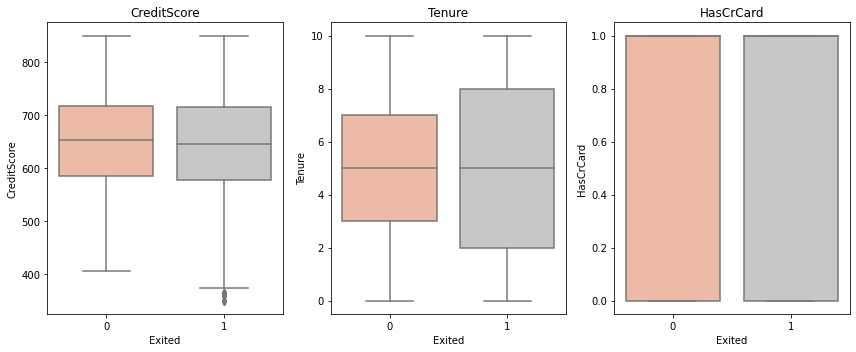

In [17]:
cols = data[['CreditScore', 'Tenure', 'HasCrCard']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['Exited'],data[variable],palette="RdGy")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

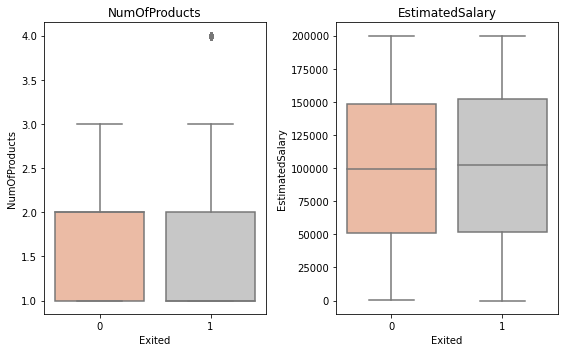

In [18]:
cols = data[['NumOfProducts', 'EstimatedSalary']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['Exited'],data[variable],palette="RdGy")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

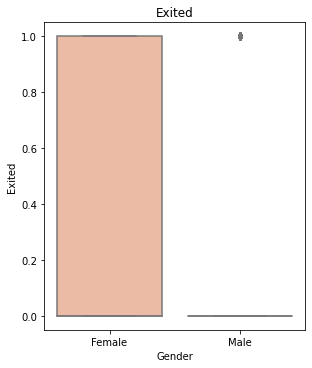

In [71]:
cols = data[['Exited']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['Gender'],data[variable],palette="RdGy")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

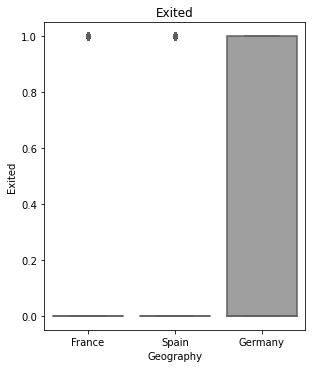

In [72]:
cols = data[['Exited']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['Geography'],data[variable],palette="RdGy")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

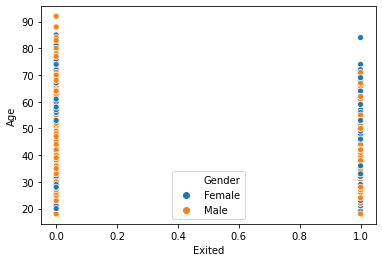

In [73]:
sns.scatterplot(x=data["Exited"], y=data["Age"], hue =data["Gender"] )
plt.show

## from this plot, it seems that there is no significant distinction between males and females who left the bank

<function matplotlib.pyplot.show(*args, **kw)>

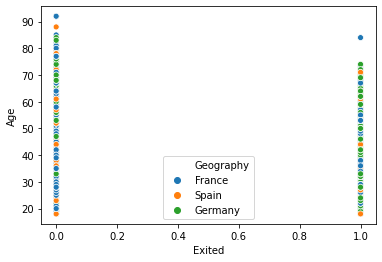

In [74]:
sns.scatterplot(x=data["Exited"], y=data["Age"], hue =data["Geography"] )
plt.show

## from this plot, it seems that there a spread of people in different ages that all left the bank

/Users/ayeshadas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


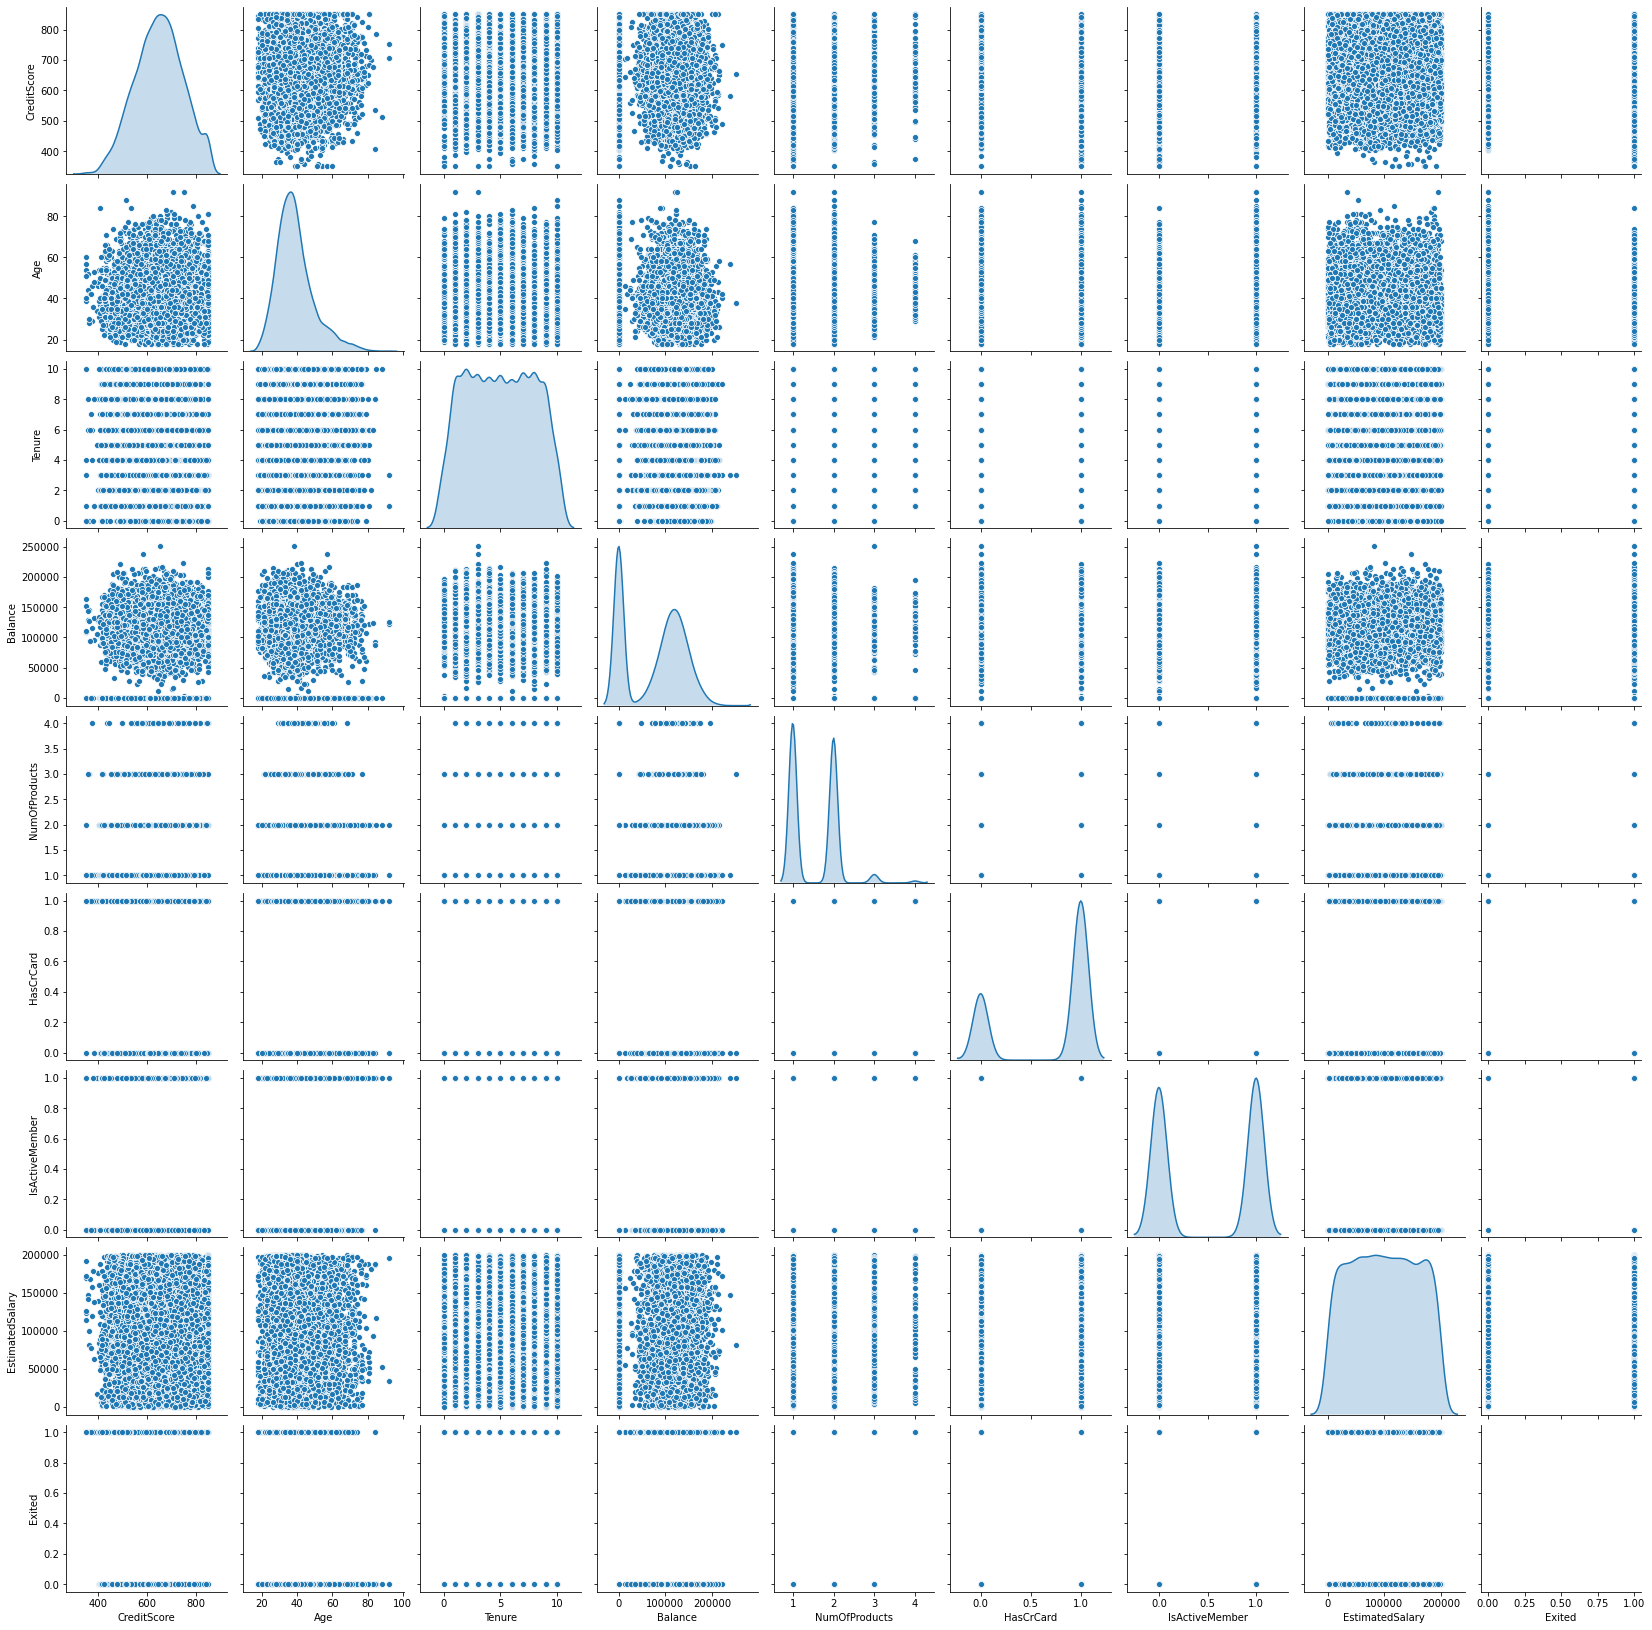

In [19]:
sns.pairplot(data=data[cols1], diag_kind="kde")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

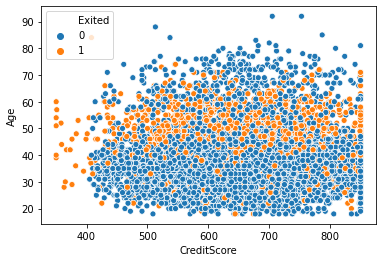

In [20]:
sns.scatterplot(x=data["CreditScore"], y=data["Age"], hue =data["Exited"] )
plt.show

## from this plot, it seems that there is an age category of many individuals who left: the 40-50 age range are the majority of the customers who have left 

<function matplotlib.pyplot.show(*args, **kw)>

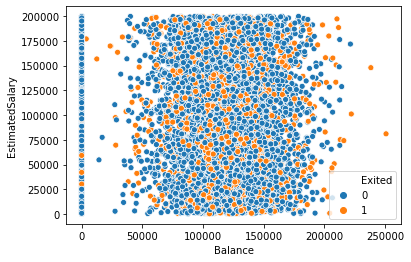

In [21]:
sns.scatterplot(x=data["Balance"], y=data["EstimatedSalary"], hue =data["Exited"] )
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

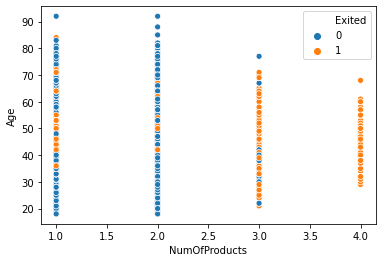

In [22]:
sns.scatterplot(x=data["NumOfProducts"], y=data["Age"], hue =data["Exited"] )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

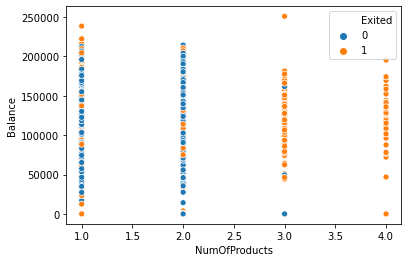

In [23]:
sns.scatterplot(x=data["NumOfProducts"], y=data["Balance"], hue =data["Exited"] )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

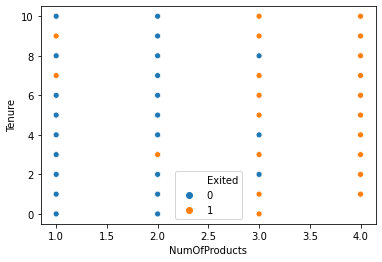

In [24]:
sns.scatterplot(x=data["NumOfProducts"], y=data["Tenure"], hue =data["Exited"] )
plt.show

#### Notes on EDA
- There is a slight left skew to the balance data 
- There is a slight right skew to the age data
- There is a slight left skew to the credit card data 


- There is a moderate negative correlation (r = -0.30) between Number of Products and Balance
- There is a moderate positive correlatopn (r = 0.29) between age and exited 
- There is a small negative correlation (r = -0.16) between is active member and exited


- From the EDA, it appears that the y variable (Exited) is not balanced. There seems to be 4 times more 0s than 1s 

- It seems that all of the customers with 4 products have all left the bank. 
- Since this is such a small number, I will remove this customers. 

- Of the customers that have stayed with the bank, it seems that they are younger in age
- Of the customers that have left, it seems that they are older on average

### Data Preprocessing 

In [26]:
### Need to do One Hot Encoding for Age and Geography since they are categorical variables

data_2 = pd.get_dummies(data, columns=["Geography","Gender"], drop_first=True)

In [27]:
data_2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [28]:
##Outliers 

# I will remove all of the customers who have bought 4 products, as the EDA showed this outlier skewed the data

data_2.drop(data_2.index[data_2['NumOfProducts'] == 4], inplace = True)



In [36]:
data_2.shape

## only 60 entries were deleted

(9940, 12)

### Split the data



In [29]:
##The variable we would like to test is the "Exited" variable

X = data_2.drop("Exited", axis = 1)

In [30]:
y = data_2["Exited"]

In [31]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
#Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=12)

In [32]:
scaler = preprocessing.MinMaxScaler()
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)


# create target scaler object

target_scaler = preprocessing.MinMaxScaler()
y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = target_scaler.fit_transform(y_test.values.reshape(-1,1))
y_val=target_scaler.fit_transform(y_val.values.reshape(-1,1))

In [33]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

X_val = X_val.astype('float32')
y_val = y_val.astype('float32')


In [34]:
X_train.shape

(6361, 11)

In [35]:
y_train.shape

(6361, 1)

In [37]:
L=pd.DataFrame(y_train)
L[0].value_counts()

0.0    5044
1.0    1317
Name: 0, dtype: int64

In [ ]:
# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)

In [38]:
# custom metrics

import keras.backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [39]:
# Initialize the constructor

model = Sequential()

In [40]:
# Define model architecture

model.add(Dense(6361,activation='relu', input_shape=(11,)))
          
model.add(Dense(100,activation='relu'))
          
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1) 

Epoch 1/10
64/64 [==============================] - 1s 8ms/step - loss: 0.4680 - accuracy: 0.7923
Epoch 2/10
64/64 [==============================] - 0s 6ms/step - loss: 0.4235 - accuracy: 0.7992
Epoch 3/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3999 - accuracy: 0.8296
Epoch 4/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3798 - accuracy: 0.8398
Epoch 5/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3682 - accuracy: 0.8442
Epoch 6/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3560 - accuracy: 0.8499
Epoch 7/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3569 - accuracy: 0.8485
Epoch 8/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3528 - accuracy: 0.8533
Epoch 9/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3473 - accuracy: 0.8551
Epoch 10/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3506 - accuracy: 0.8530


In [43]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.862
Loss: 0.351


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6361)              76332     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               636200    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 712,633
Trainable params: 712,633
Non-trainable params: 0
_________________________________________________________________


In [45]:
y_predict1 = model.predict(X_test)

In [46]:
y_pred = []
for val in y_predict1:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[1614    0]
 [ 374    0]]


### Create ROC curve 

In [68]:
import matplotlib.ticker as ticker

from sklearn.metrics import roc_curve, auc

y_pred_keras = model3.predict(X_test).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)


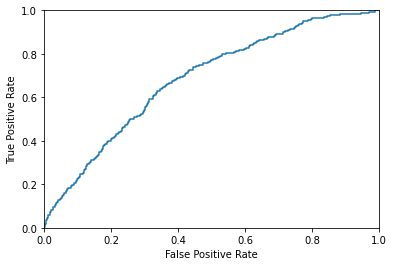

In [70]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr_keras,tpr_keras) 

#### Insights from the first model

- Accuracy is fairly good. We have an accuracy at 86%. 
- However, the loss is very bad at 35%. The next model will attempt to decrease this loss 
- The confusion matrix also appears to have no inputs for the "0" category, so I will attempt to fix this in the next model 

In [47]:
### We will now try a different model to attain less loss by increasing the density of the first hidden layer after the input layer

model2 = Sequential()

In [48]:
# Define model architecture

model2.add(Dense(6361,activation='relu', input_shape=(11,)))

model2.add(Dense(1000,activation='relu'))
          
model2.add(Dense(1,activation='sigmoid'))

In [49]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model2.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1) 

Epoch 1/10
64/64 [==============================] - 2s 30ms/step - loss: 0.4568 - accuracy: 0.8049
Epoch 2/10
64/64 [==============================] - 2s 30ms/step - loss: 0.3972 - accuracy: 0.8327
Epoch 3/10
64/64 [==============================] - 2s 29ms/step - loss: 0.3708 - accuracy: 0.8470
Epoch 4/10
64/64 [==============================] - 2s 29ms/step - loss: 0.3661 - accuracy: 0.8478
Epoch 5/10
64/64 [==============================] - 2s 29ms/step - loss: 0.3575 - accuracy: 0.8485
Epoch 6/10
64/64 [==============================] - 2s 29ms/step - loss: 0.3521 - accuracy: 0.8511
Epoch 7/10
64/64 [==============================] - 2s 29ms/step - loss: 0.3499 - accuracy: 0.8541
Epoch 8/10
64/64 [==============================] - 2s 30ms/step - loss: 0.3479 - accuracy: 0.8552
Epoch 9/10
64/64 [==============================] - 2s 31ms/step - loss: 0.3423 - accuracy: 0.8568
Epoch 10/10
64/64 [==============================] - 2s 30ms/step - loss: 0.3463 - accuracy: 0.8530


In [51]:
loss, acc = model2.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.854
Loss: 0.377


In [52]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6361)              76332     
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              6362000   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1001      
Total params: 6,439,333
Trainable params: 6,439,333
Non-trainable params: 0
_________________________________________________________________


In [53]:
y_predict2 = model2.predict(X_test)

In [54]:
y_pred2 = []
for val in y_predict2:
    y_pred2.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[1614    0]
 [ 374    0]]


#### Insights from the second model
- accuracy decreased and loss increased from the first model. This leads me to believe that I was on the right track before, and will explore the effect of adding 1 more hidden layer to the network instead of increasing the size of the neuron

In [55]:
### We will now iterate through a third model to improve the loss

In [56]:
### We will now try a different model to attain less loss by decreasing the number of hidden layers
model3 = Sequential()

In [57]:
# Define model architecture

model3.add(Dense(6361,activation='relu', input_shape=(11,)))
          
model3.add(Dense(1,activation='sigmoid'))

In [58]:
model3.compile(loss='binary_crossentropy',optimizer='sgd',metrics=["accuracy"])

In [59]:
model3.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1) 

Epoch 1/10
64/64 [==============================] - 1s 4ms/step - loss: 0.5984 - accuracy: 0.7702
Epoch 2/10
64/64 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7930
Epoch 3/10
64/64 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7930
Epoch 4/10
64/64 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7930
Epoch 5/10
64/64 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7930
Epoch 6/10
64/64 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7930
Epoch 7/10
64/64 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7930
Epoch 8/10
64/64 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7930
Epoch 9/10
64/64 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7930
Epoch 10/10
64/64 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7930


In [60]:
loss, acc = model3.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.812
Loss: 0.459


In [61]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6361)              76332     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6362      
Total params: 82,694
Trainable params: 82,694
Non-trainable params: 0
_________________________________________________________________


#### Insights from the third model: 
- accuracy and loss both decreased in this model, so maybe an improvement in the model will be seen by adding more neurons and not less
- the sgd optimizer was used in this model instead of adam, which also yielded a larger loss, so adam will be used in the next model

In [62]:
model4 = Sequential()

# Define model architecture

model4.add(Dense(6361,activation='relu', input_shape=(11,)))

model4.add(Dense(100,activation='relu'))

model4.add(Dense(50,activation='relu'))
          
model4.add(Dense(1,activation='sigmoid'))


In [63]:
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

In [64]:
model4.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1) 

Epoch 1/10
64/64 [==============================] - 1s 8ms/step - loss: 0.4779 - accuracy: 0.7931
Epoch 2/10
64/64 [==============================] - 0s 6ms/step - loss: 0.4220 - accuracy: 0.8191
Epoch 3/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3967 - accuracy: 0.8332
Epoch 4/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy: 0.8472
Epoch 5/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3575 - accuracy: 0.8519
Epoch 6/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3514 - accuracy: 0.8536
Epoch 7/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3510 - accuracy: 0.8555
Epoch 8/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3448 - accuracy: 0.8580
Epoch 9/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3424 - accuracy: 0.8568
Epoch 10/10
64/64 [==============================] - 0s 7ms/step - loss: 0.3392 - accuracy: 0.8602


In [65]:
loss, acc = model4.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.858
Loss: 0.352


In [66]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6361)              76332     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               636200    
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 717,633
Trainable params: 717,633
Non-trainable params: 0
_________________________________________________________________


In [67]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90      1614
         1.0       0.00      0.00      0.00       374

    accuracy                           0.81      1988
   macro avg       0.41      0.50      0.45      1988
weighted avg       0.66      0.81      0.73      1988



/Users/ayeshadas/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayeshadas/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayeshadas/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Insights from model 4

- It seems that there is a plateau with my model on the accuracy that can be attained 
- It seems that the highest accuracy we can achieve is 86%
- However, this comes with a loss of 35%. 

- Since both of these values are not changing much, we can assume that this is the most efficient we can tune the hyperparameters

- there is also the same case where the 1s are not being correctly identified, but I do not know how to fix this issue


- Model 4 also seems to over fit on recall, but the accuracy, precision, and recall, are ok 

- This leads me to believe that there are still points for improvement on this model in terms of improving on recall (the amount of people leaving being correctly labelled), an important metric for this bank



## Conclusion for the bank

- The bank should focus on active customers, usually younger in age in order to increase their likelihood of retaining them